In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load the iris dataset
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)



 ## Z-Score Method
The Z-score method identifies outliers by measuring how many standard deviations a data point is from the mean.

Data shape before outlier removal: (150, 4)
Data shape after outlier removal (Z-Score): (149, 4)


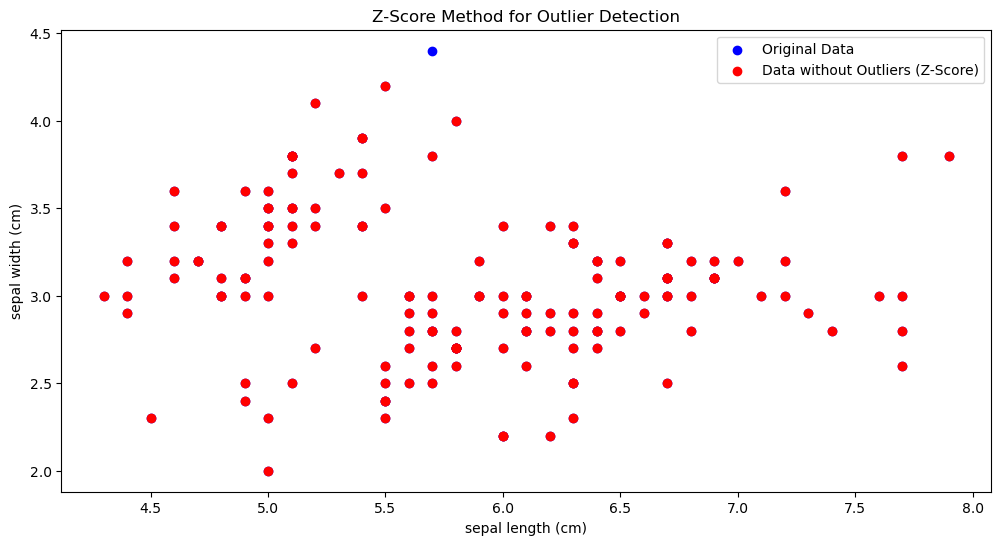

In [2]:
# Calculate Z-scores
z_scores = np.abs(stats.zscore(data))
threshold = 3
outliers = np.where(z_scores > threshold)

# Remove outliers
data_zs = data[(z_scores < threshold).all(axis=1)]

print("Data shape before outlier removal:", data.shape)
print("Data shape after outlier removal (Z-Score):", data_zs.shape)
# Visualization
plt.figure(figsize=(12, 6))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], color='blue', label='Original Data')
plt.scatter(data_zs.iloc[:, 0], data_zs.iloc[:, 1], color='red', label='Data without Outliers (Z-Score)')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Z-Score Method for Outlier Detection')
plt.legend()
plt.show()


 # Interquartile Range (IQR) Method
The IQR method identifies outliers by looking at the spread of the middle 50% of the data.

Data shape before outlier removal: (150, 4)
Data shape after outlier removal (IQR): (146, 4)


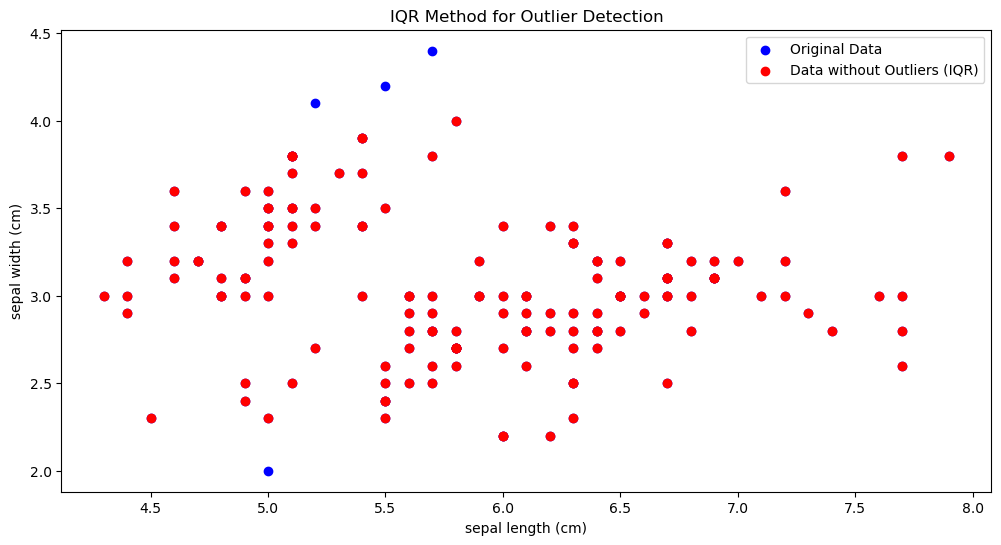

In [3]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)

# Remove outliers
data_iqr = data[~outliers]

print("Data shape before outlier removal:", data.shape)
print("Data shape after outlier removal (IQR):", data_iqr.shape)


# Visualization
plt.figure(figsize=(12, 6))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], color='blue', label='Original Data')
plt.scatter(data_iqr.iloc[:, 0], data_iqr.iloc[:, 1], color='red', label='Data without Outliers (IQR)')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('IQR Method for Outlier Detection')
plt.legend()
plt.show()

# Isolation Forest
Isolation Forest is an algorithm specifically designed to detect outliers.

Data shape before outlier removal: (150, 4)
Data shape after outlier removal (Isolation Forest): (135, 4)


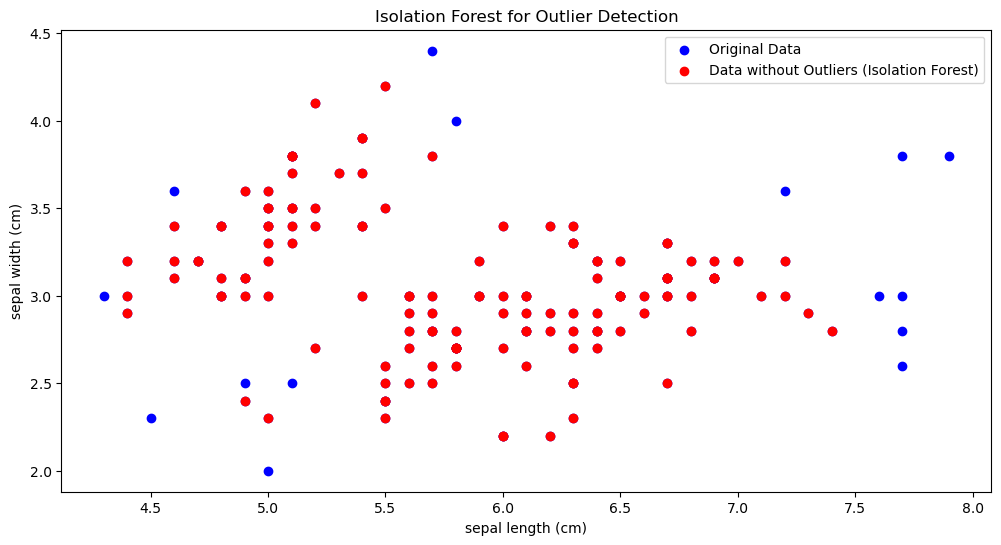

In [4]:
from sklearn.ensemble import IsolationForest

# Initialize the model
iso_forest = IsolationForest(contamination=0.1)

# Fit the model
outliers = iso_forest.fit_predict(data)

# Remove outliers
data_if = data[outliers == 1]

print("Data shape before outlier removal:", data.shape)
print("Data shape after outlier removal (Isolation Forest):", data_if.shape)

# Visualization
plt.figure(figsize=(12, 6))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], color='blue', label='Original Data')
plt.scatter(data_if.iloc[:, 0], data_if.iloc[:, 1], color='red', label='Data without Outliers (Isolation Forest)')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Isolation Forest for Outlier Detection')
plt.legend()
plt.show()


# DBSCAN
DBSCAN is a clustering method that can also be used to identify outliers.

Data shape before outlier removal: (150, 4)
Data shape after outlier removal (DBSCAN): (133, 4)


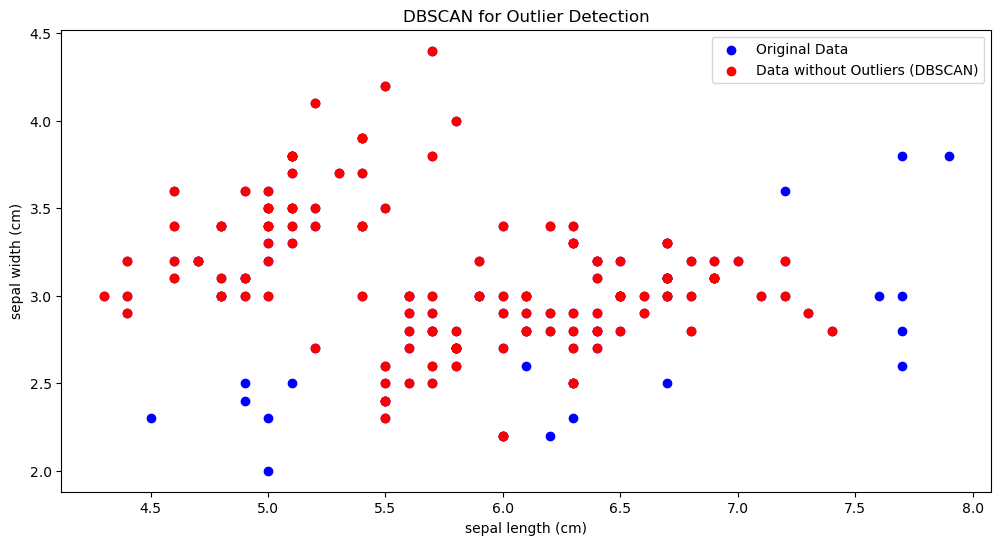

In [5]:
from sklearn.cluster import DBSCAN

# Initialize the model
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit the model
clusters = dbscan.fit_predict(data)

# Identify outliers (points labeled as -1 are outliers)
outliers = clusters == -1

# Remove outliers
data_dbscan = data[~outliers]

print("Data shape before outlier removal:", data.shape)
print("Data shape after outlier removal (DBSCAN):", data_dbscan.shape)


# Visualization
plt.figure(figsize=(12, 6))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], color='blue', label='Original Data')
plt.scatter(data_dbscan.iloc[:, 0], data_dbscan.iloc[:, 1], color='red', label='Data without Outliers (DBSCAN)')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('DBSCAN for Outlier Detection')
plt.legend()
plt.show()


# Outlier detection for timeseries

## Creating a Sample Time Series Dataset
Let's start by creating a synthetic time series dataset with seasonality, trend, and injected outliers.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [7]:
# Generate a date range (e.g., daily data for one year)
date_range = pd.date_range(start='2023-01-01', periods=365, freq='D')


In [8]:
# Generate synthetic data (e.g., daily temperatures with some noise)
np.random.seed(42)  # For reproducibility
data = 20 + 10 * np.sin(2 * np.pi * date_range.dayofyear / 365) + np.random.normal(0, 2, len(date_range))


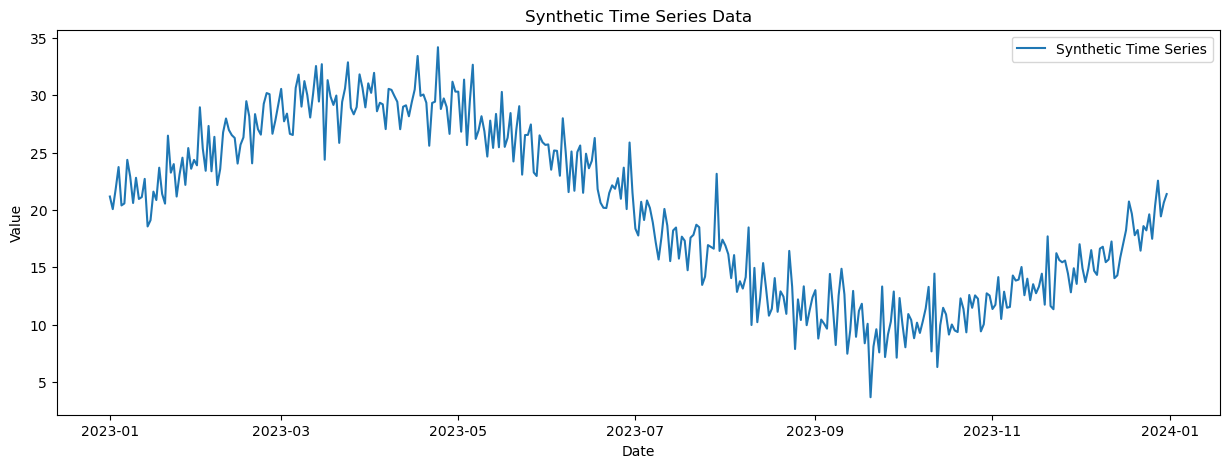

In [9]:
# Create a DataFrame
df = pd.DataFrame({'Date': date_range, 'Value': data})
df.set_index('Date', inplace=True)  # Set the date range as the index
# Plot the time series
plt.figure(figsize=(15, 5))
plt.plot(df.index, df['Value'], label='Synthetic Time Series')
plt.title('Synthetic Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

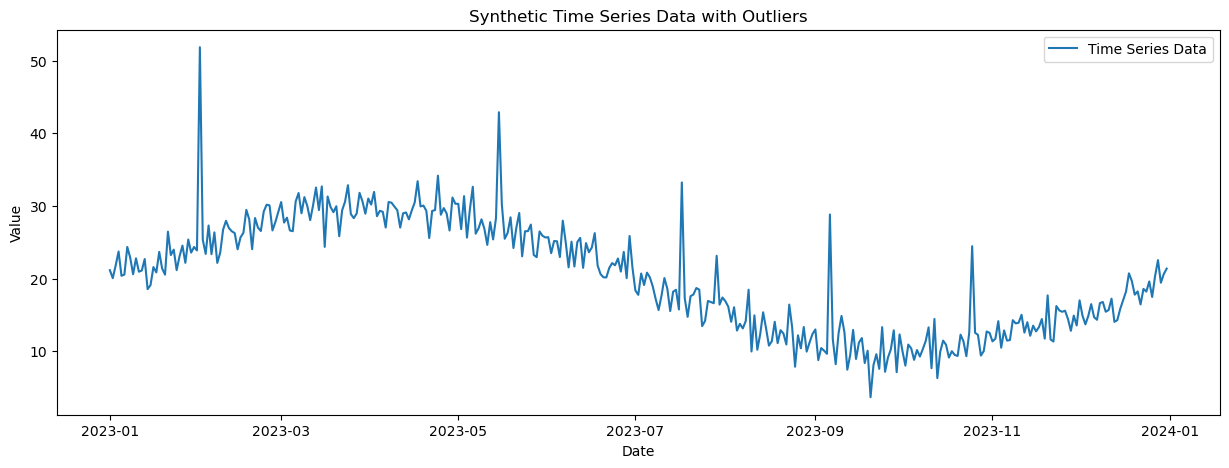

In [10]:
# Ensure data is a NumPy array
data = np.array(data)
# Add outliers
outlier_indices = np.random.choice(len(data), size=5, replace=False)  # Randomly select 5 indices

# Modify the NumPy array directly
data_with_outliers = data.copy()  # Create a copy of data to avoid modifying in place

# Add outliers by adding large anomalies to the selected indices
data_with_outliers[outlier_indices] = data_with_outliers[outlier_indices] + np.random.normal(15, 5, size=outlier_indices.shape[0])




# Create DataFrame
df = pd.DataFrame({'Date': date_range, 'Value': data_with_outliers})
df.set_index('Date', inplace=True)

# Visualize the original time series
plt.figure(figsize=(15,5))
plt.plot(df.index, df['Value'], label='Time Series Data')
plt.title('Synthetic Time Series Data with Outliers')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

# Rolling Statistics
This method calculates rolling statistics (e.g., rolling mean and standard deviation) and identifies outliers based on deviations from these statistics.

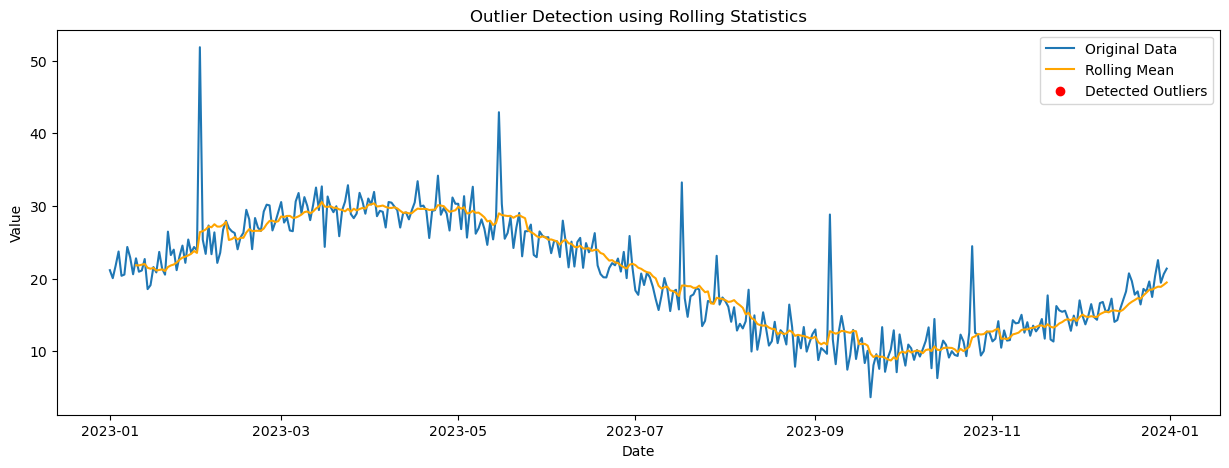

In [11]:

# Calculate rolling statistics
window_size = 10
rolling_mean = df['Value'].rolling(window=window_size).mean()
rolling_std = df['Value'].rolling(window=window_size).std()

# Define threshold (e.g., 3 standard deviations)
threshold = 3

# Identify outliers
outliers = df[np.abs(df['Value'] - rolling_mean) > threshold * rolling_std]

# Visualize the results
plt.figure(figsize=(15,5))
plt.plot(df.index, df['Value'], label='Original Data')
plt.plot(df.index, rolling_mean, color='orange', label='Rolling Mean')
plt.scatter(outliers.index, outliers['Value'], color='red', label='Detected Outliers')
plt.title('Outlier Detection using Rolling Statistics')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


# Seasonal Decomposition
Using seasonal decomposition, we break down the time series into trend, seasonality, and residual components. Outliers are often visible in the residual component.

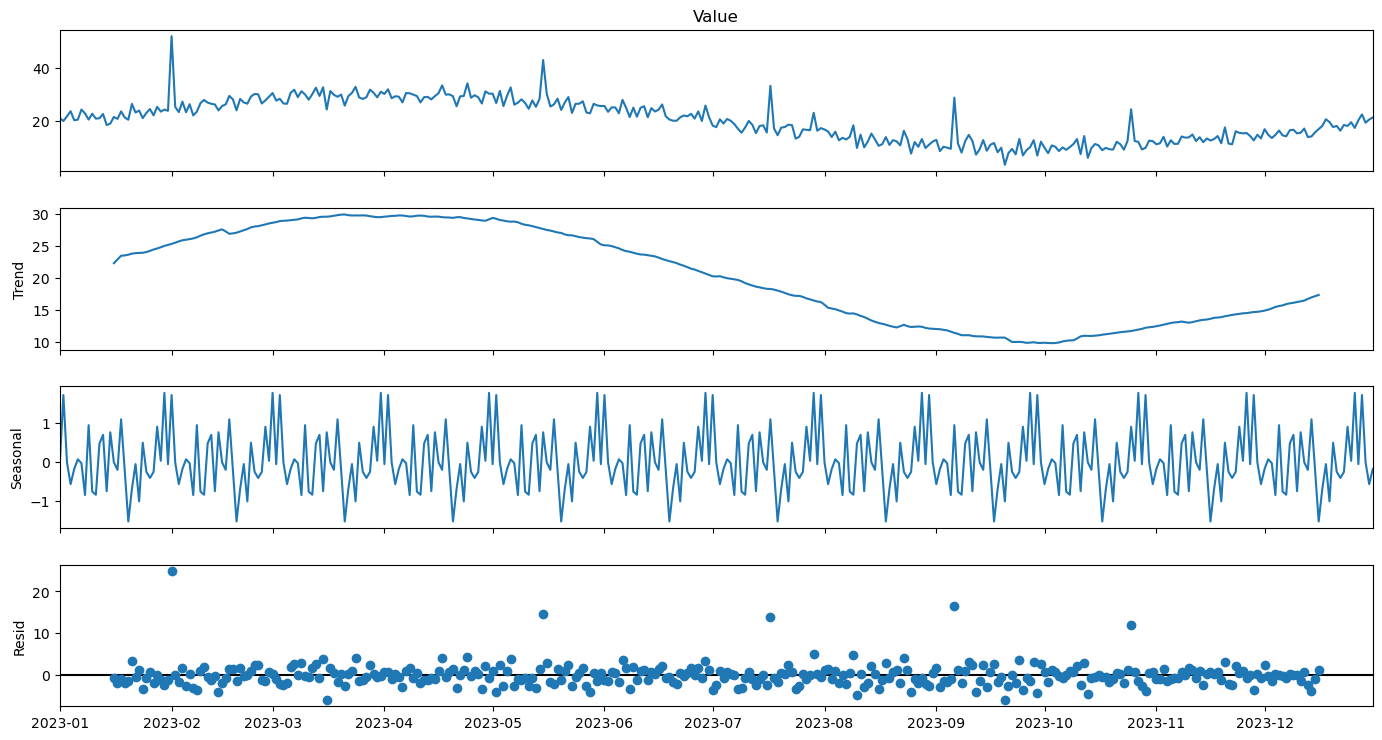

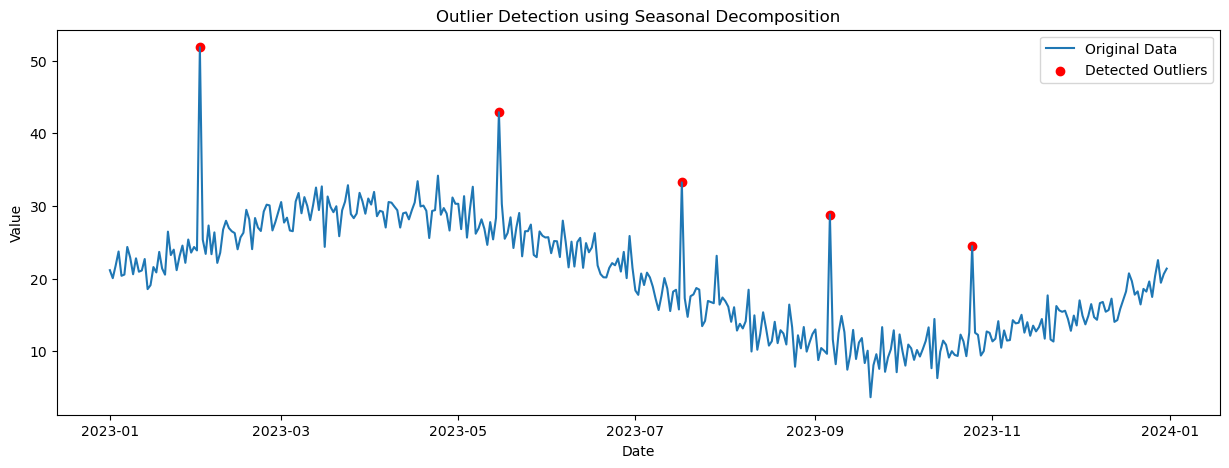

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Apply seasonal decomposition
decomposition = seasonal_decompose(df['Value'], model='additive', period=30)

# Plot decomposed components
fig = decomposition.plot()
fig.set_size_inches(15, 8)
plt.show()

# Extract residuals and identify outliers using Z-score
residual = decomposition.resid.dropna()
z_scores = np.abs((residual - residual.mean()) / residual.std())
outliers_decomp = residual[z_scores > 3]

# Visualize the results
plt.figure(figsize=(15,5))
plt.plot(df.index, df['Value'], label='Original Data')
plt.scatter(outliers_decomp.index, df.loc[outliers_decomp.index]['Value'], color='red', label='Detected Outliers')
plt.title('Outlier Detection using Seasonal Decomposition')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


# Prophet
Prophet is a powerful tool that models seasonality and trend, and can be used for anomaly detection by comparing actual values against predicted values.

07:25:36 - cmdstanpy - INFO - Chain [1] start processing
07:25:36 - cmdstanpy - INFO - Chain [1] done processing


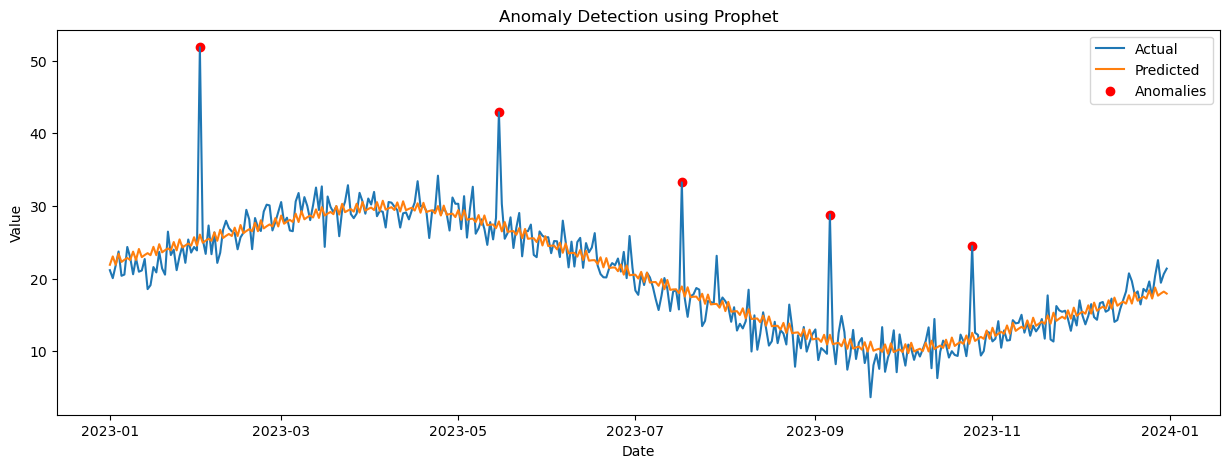

In [13]:
from prophet import Prophet

# Prepare the data for Prophet
df_prophet = df.reset_index().rename(columns={'Date': 'ds', 'Value': 'y'})

# Fit the Prophet model
model = Prophet()
model.fit(df_prophet)

# Create a dataframe with future dates for prediction (not necessary here)
future = model.make_future_dataframe(periods=0)
forecast = model.predict(future)

# Calculate residuals
df_prophet['yhat'] = forecast['yhat']
df_prophet['residual'] = df_prophet['y'] - df_prophet['yhat']

# Identify anomalies (3 standard deviations away from the mean)
std_residual = np.std(df_prophet['residual'])
threshold = 3 * std_residual
df_prophet['anomaly'] = df_prophet['residual'].apply(lambda x: 1 if np.abs(x) > threshold else 0)

# Extract anomalies
anomalies_prophet = df_prophet[df_prophet['anomaly'] == 1]

# Visualize the results
plt.figure(figsize=(15,5))
plt.plot(df_prophet['ds'], df_prophet['y'], label='Actual')
plt.plot(df_prophet['ds'], df_prophet['yhat'], label='Predicted')
plt.scatter(anomalies_prophet['ds'], anomalies_prophet['y'], color='red', label='Anomalies')
plt.title('Anomaly Detection using Prophet')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


# Isolation Forest
Isolation Forest is an unsupervised machine learning algorithm that's particularly effective for anomaly detection, including in time series data. The algorithm works by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature. The logic behind it is that outliers are more likely to be isolated earlier in the random partitioning process than normal points.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest


In [15]:
# Reshape the data to 2D array (required by IsolationForest)
X = df['Value'].values.reshape(-1, 1)

# Apply Isolation Forest
iso_forest = IsolationForest(contamination=0.01, random_state=42)
df['Anomaly'] = iso_forest.fit_predict(X)

# Anomalies are labeled as -1, normal points as 1
outliers = df[df['Anomaly'] == -1]
normal_data = df[df['Anomaly'] == 1]


In [16]:
# Remove the outliers
df_cleaned = df[df['Anomaly'] == 1]


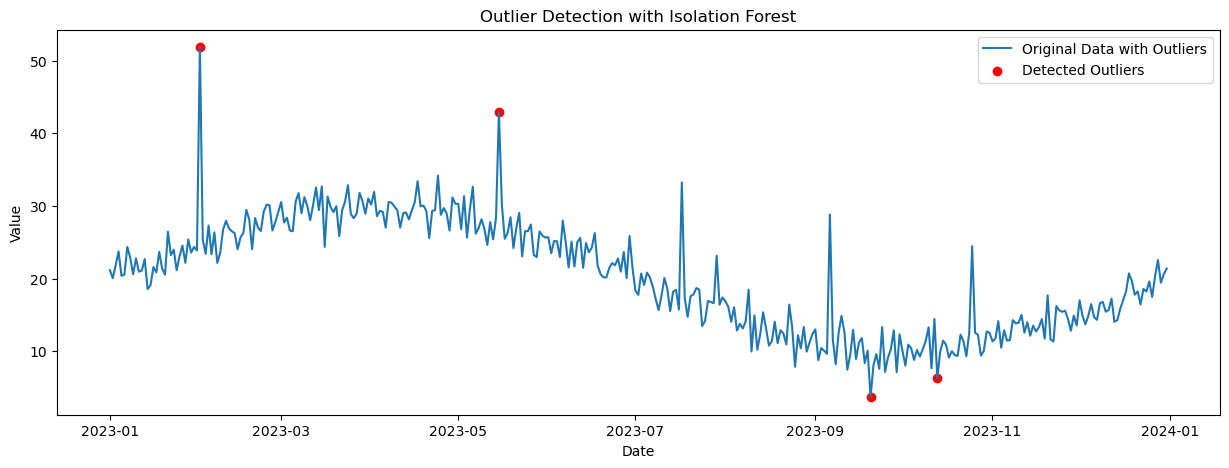

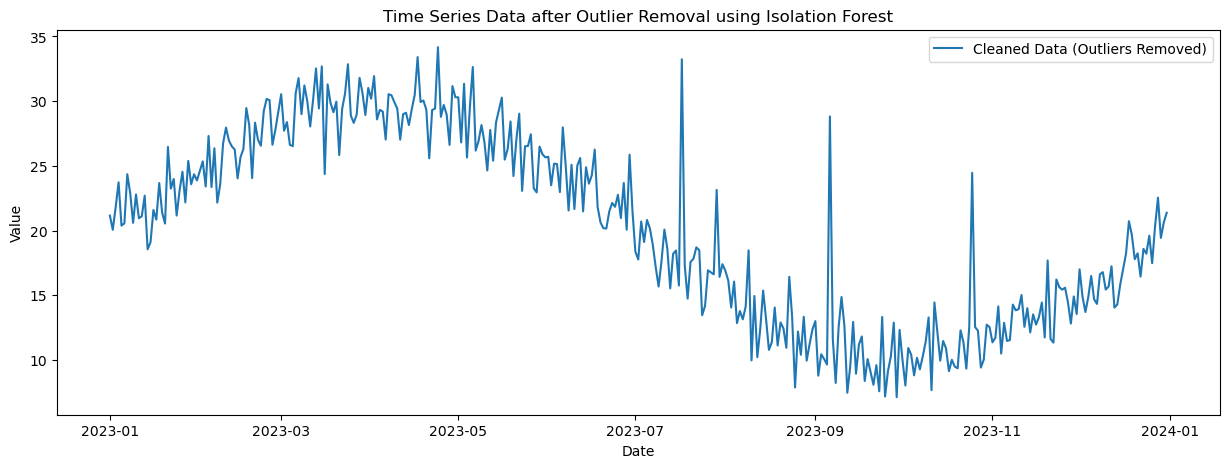

In [17]:
# Plot the original time series with detected outliers
plt.figure(figsize=(15, 5))
plt.plot(df.index, df['Value'], label='Original Data with Outliers')
plt.scatter(outliers.index, outliers['Value'], color='red', label='Detected Outliers')
plt.title('Outlier Detection with Isolation Forest')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

# Plot the cleaned time series after removing outliers
plt.figure(figsize=(15, 5))
plt.plot(df_cleaned.index, df_cleaned['Value'], label='Cleaned Data (Outliers Removed)')
plt.title('Time Series Data after Outlier Removal using Isolation Forest')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


 # ARIMA
ARIMA (AutoRegressive Integrated Moving Average) is a widely used statistical method for time series forecasting, and it can also be used to detect and remove outliers by analyzing the residuals (the difference between the actual values and the predicted values).

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from scipy import stats


In [19]:
# Fit an ARIMA model
model = ARIMA(df['Value'], order=(5, 1, 0))  # Here (5, 1, 0) are the ARIMA parameters, adjust as needed
model_fit = model.fit()

# Get the residuals from the model
df['Residuals'] = model_fit.resid


/home/nivedita/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/nivedita/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/nivedita/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


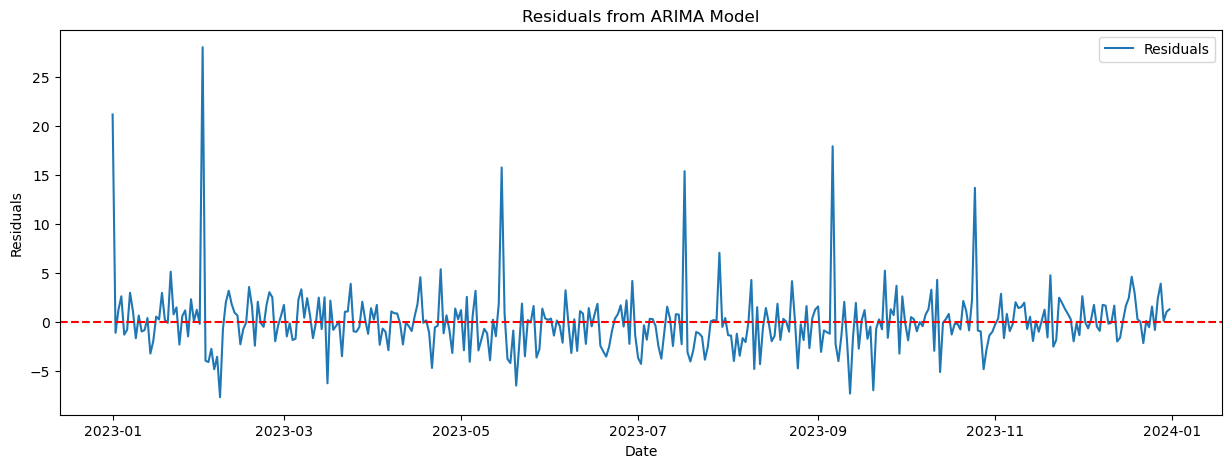

In [20]:
# Plot residuals
plt.figure(figsize=(15, 5))
plt.plot(df.index, df['Residuals'], label='Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals from ARIMA Model')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.show()

# Detect outliers using Z-score
z_scores = np.abs(stats.zscore(df['Residuals']))
df['Outlier'] = z_scores > 3  # Mark as outlier if Z-score is greater than 3


In [21]:
# Remove the outliers
df_cleaned = df[df['Outlier'] == False]


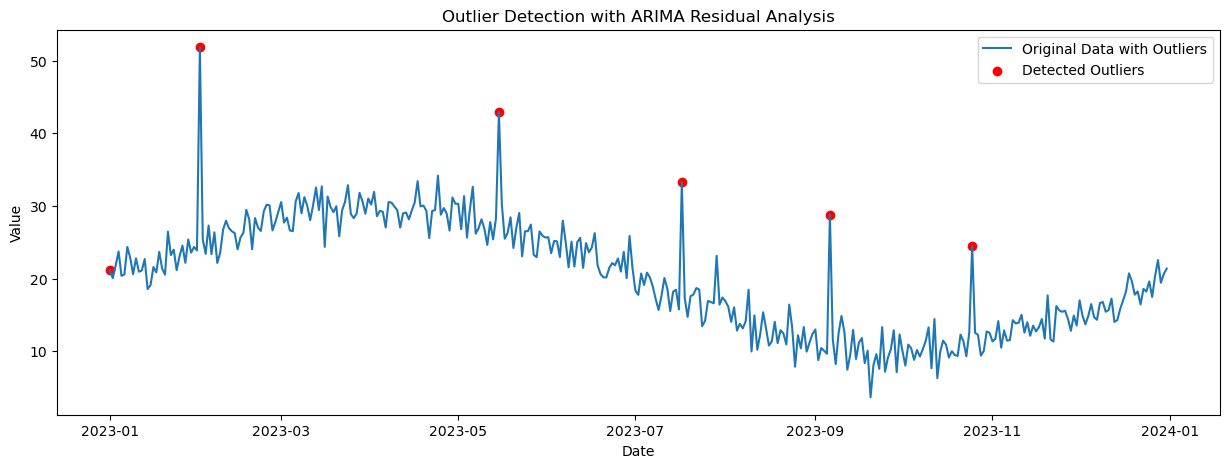

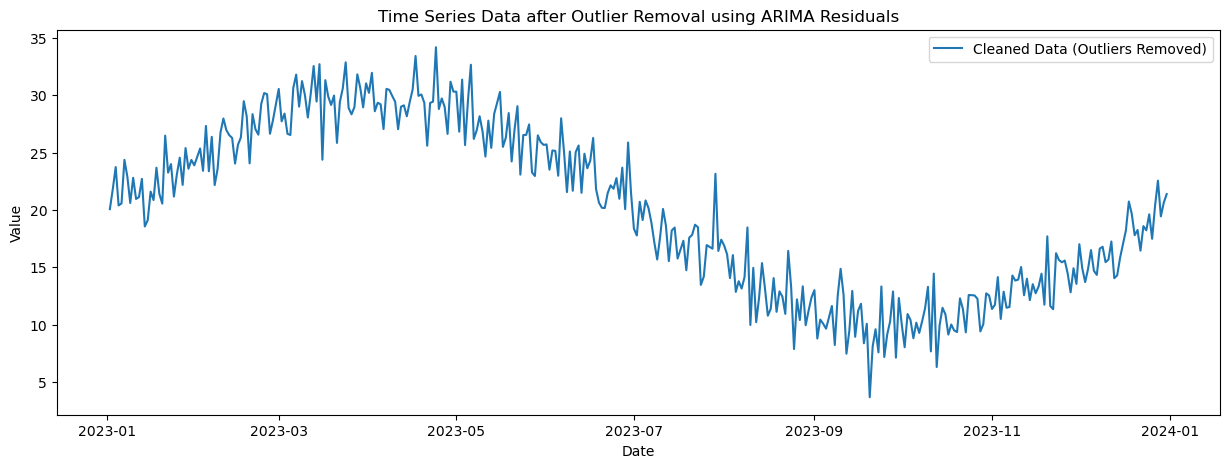

In [22]:
# Plot the original time series with detected outliers
plt.figure(figsize=(15, 5))
plt.plot(df.index, df['Value'], label='Original Data with Outliers')
plt.scatter(df[df['Outlier']].index, df[df['Outlier']]['Value'], color='red', label='Detected Outliers')
plt.title('Outlier Detection with ARIMA Residual Analysis')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

# Plot the cleaned time series after removing outliers
plt.figure(figsize=(15, 5))
plt.plot(df_cleaned.index, df_cleaned['Value'], label='Cleaned Data (Outliers Removed)')
plt.title('Time Series Data after Outlier Removal using ARIMA Residuals')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()
